In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

KeyboardInterrupt: 

In [4]:
df=pd.read_csv('fraud.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [6]:
cols_to_drop = [
    'first', 'last', 'street', 'city', 'state', 'zip', 'dob',
    'cc_num', 'trans_num'
]
df= df.drop(columns=cols_to_drop)

print(df.head())

  trans_date_trans_time                           merchant     category  \
0   2019-01-01 00:00:44    fraud_Heller, Gutmann and Zieme  grocery_pos   
1   2019-01-01 00:12:34  fraud_Schultz, Simonis and Little  grocery_pos   
2   2019-01-01 00:17:16                  fraud_Kling-Grant  grocery_net   
3   2019-01-01 00:20:15              fraud_Deckow-O'Conner  grocery_pos   
4   2019-01-01 00:23:41             fraud_Balistreri-Nader     misc_pos   

      amt gender      lat      long  city_pop  \
0  107.23      F  48.8878 -118.2105       149   
1   44.71      M  40.6747  -74.2239    124967   
2   46.28      F  40.6152  -74.4150     71485   
3   64.09      M  42.2203  -83.3583     31515   
4   25.58      F  30.4066  -91.1468    378909   

                                 job   unix_time  merch_lat  merch_long  \
0  Special educational needs teacher  1325376044  49.159047 -118.186462   
1             Operational researcher  1325376754  40.079588  -74.848087   
2             Leisure centre 

In [7]:
df.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,69.050120,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,160.322867,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,1.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,8.960000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,42.170000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,80.330000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,25086.940000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   merchant               491134 non-null  object 
 2   category               491134 non-null  object 
 3   amt                    491134 non-null  float64
 4   gender                 491134 non-null  object 
 5   lat                    491134 non-null  float64
 6   long                   491134 non-null  float64
 7   city_pop               491134 non-null  int64  
 8   job                    491134 non-null  object 
 9   unix_time              491134 non-null  int64  
 10  merch_lat              491134 non-null  float64
 11  merch_long             491134 non-null  float64
 12  is_fraud               491134 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 48.7+ MB


In [9]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# 거래가 발생한 요일 (0=월요일, 6=일요일)
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

# 거래가 발생한 시간대 (0~23시)
df['hour_of_day'] = df['trans_date_trans_time'].dt.hour

# 거래가 발생한 월 (1~12월)
df['month'] = df['trans_date_trans_time'].dt.month

# 거래가 주말에 발생한 것인지 여부 (0=평일, 1=주말)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [10]:
df.head()

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,day_of_week,hour_of_day,month,is_weekend
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,1,0,1,0
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,1325376754,40.079588,-74.848087,0,1,0,1,0
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1325377036,40.021888,-74.228188,0,1,0,1,0
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,1325377215,42.360426,-83.552316,0,1,0,1,0
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",1325377421,29.737426,-90.853194,0,1,0,1,0


In [11]:
normal_trans = df[df['is_fraud'] == 0]  # 정상 거래
fraud_trans = df[df['is_fraud'] == 1]   # 사기 거래

# 수치형 변수들의 기본 통계량 계산 (정상 거래와 사기 거래)
normal_stats = normal_trans.describe()  # 정상 거래의 통계량
fraud_stats = fraud_trans.describe()     # 사기 거래의 통계량

print("정상 거래 통계량:")
print(normal_stats)

print("\n사기 거래 통계량:")
print(fraud_stats)

# 특정 컬럼의 통계량을 비교 (예: 거래 금액 `amt`)
print("\n정상 거래와 사기 거래의 거래 금액(amt) 비교:")
print("정상 거래 평균 거래 금액:", normal_trans['amt'].mean())
print("사기 거래 평균 거래 금액:", fraud_trans['amt'].mean())

정상 거래 통계량:
               trans_date_trans_time            amt            lat  \
count                         489890  489890.000000  489890.000000   
mean   2020-01-21 15:13:24.311304192      68.011761      37.931007   
min              2019-01-01 00:00:44       1.000000      24.655700   
25%    2019-07-24 04:33:43.249999872       8.950000      33.746700   
50%       2020-01-04 00:08:46.500000      42.080000      38.507200   
75%    2020-07-24 03:46:49.750000128      80.060000      41.520500   
max              2020-12-31 23:59:34   25086.940000      48.887800   
std                              NaN     157.926044       5.341229   

                long      city_pop     unix_time      merch_lat  \
count  489890.000000  4.898900e+05  4.898900e+05  489890.000000   
mean      -90.497433  1.214979e+05  1.358738e+09      37.930024   
min      -122.345600  4.600000e+01  1.325376e+09      23.655789   
25%       -97.235100  1.228000e+03  1.343104e+09      33.780872   
50%       -87.591700  5

<Axes: xlabel='None', ylabel='amt'>

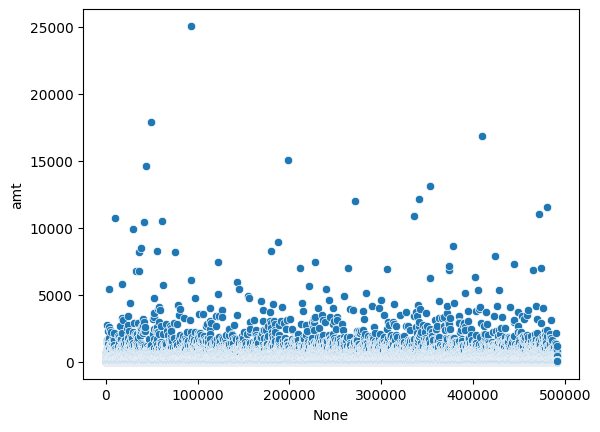

In [12]:
import seaborn as sns
sns.scatterplot(x = normal_trans.index, y = normal_trans['amt'])

<Axes: xlabel='None', ylabel='amt'>

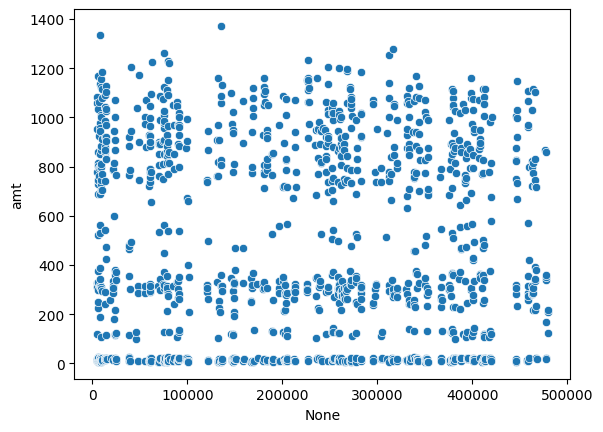

In [13]:
sns.scatterplot(x = fraud_trans.index, y = fraud_trans['amt'])

In [14]:
'''사기거래는 전부 'amt'값이 1400 밑으로 형성되어있다..
'amt의 평균이 사기거래가 대략 478 정상거래가 68로 사기거래가 훨씬 크지만 구매 건수의 차이로 인한 결과이다'''

"사기거래는 전부 'amt'값이 1400 밑으로 형성되어있다..\n'amt의 평균이 사기거래가 대략 478 정상거래가 68로 사기거래가 훨씬 크지만 구매 건수의 차이로 인한 결과이다"

In [15]:
normal_below_1400 = normal_trans[normal_trans['amt'] <= 1400]
normal_above_1400 = normal_trans[normal_trans['amt'] > 1400]
print(normal_below_1400.shape[0])
print(normal_above_1400.shape[0])

489145
745


In [16]:
'''다만 정상거래의 경우 'amt'값이 1400이 넘는 데이터는 745 건 밖에 안 된다'''

"다만 정상거래의 경우 'amt'값이 1400이 넘는 데이터는 745 건 밖에 안 된다"

In [25]:
n_amt_stdz=(normal_below_1400['amt'] - normal_below_1400['amt'].mean()) /normal_below_1400['amt'].std()
f_amt_stdz=(fraud_trans['amt'] - fraud_trans['amt'].mean()) / fraud_trans['amt'].std()


Text(0, 0.5, 'Density')

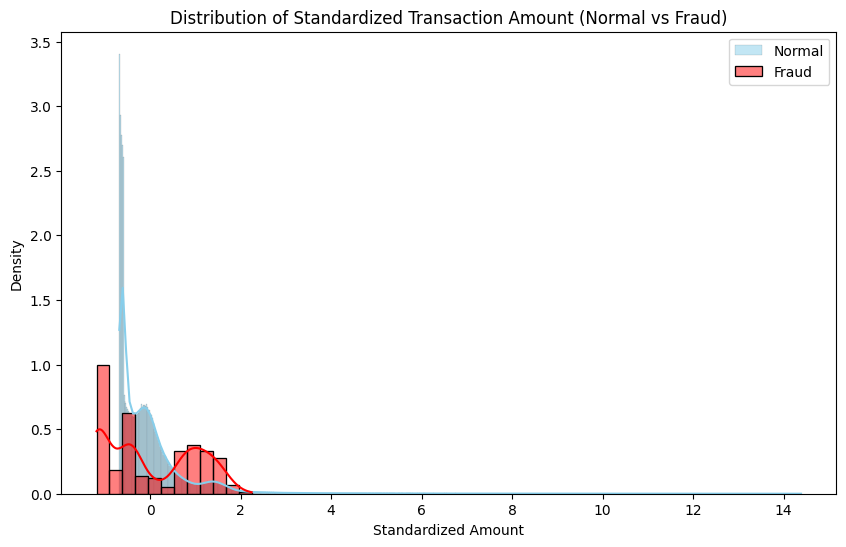

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(n_amt_stdz, color='skyblue', kde=True, label='Normal', stat='density')
sns.histplot(f_amt_stdz, color='red', kde=True, label='Fraud', stat='density')

# 범례 추가
plt.legend()

# 그래프 제목 및 레이블
plt.title('Distribution of Standardized Transaction Amount (Normal vs Fraud)')
plt.xlabel('Standardized Amount')
plt.ylabel('Density')

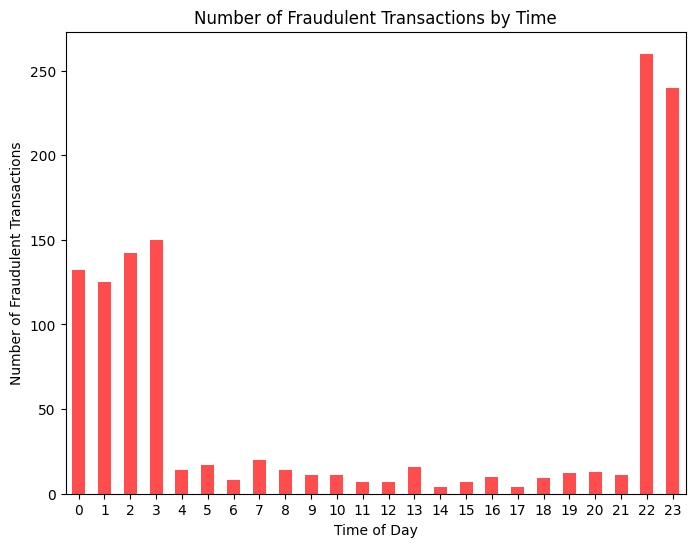

In [28]:
fraud_by_time=fraud_trans.groupby('hour_of_day')['is_fraud'].count()
plt.figure(figsize=(8, 6))
fraud_by_time.plot(kind='bar', color='red', alpha=0.7)

plt.title('Number of Fraudulent Transactions by Time')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=0)
plt.show()

In [ ]:
'''22~0시까지 가장 사기거래 건 수 많음'''

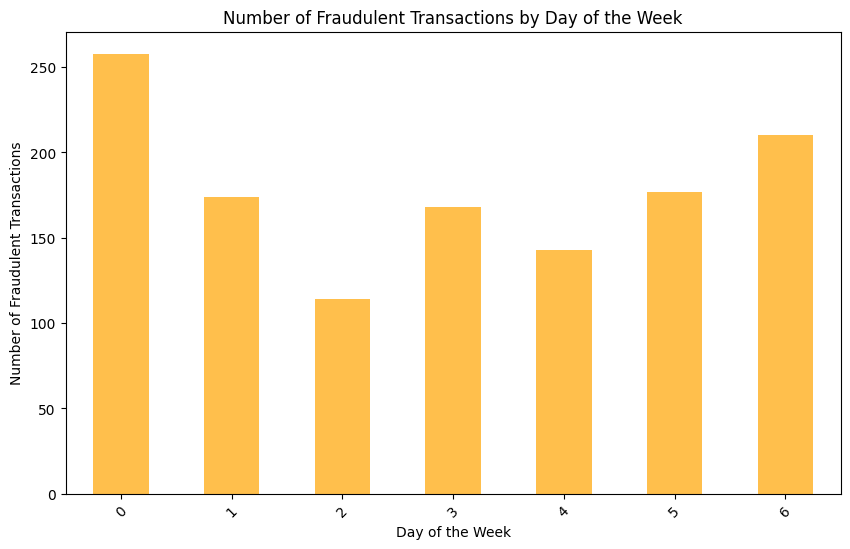

In [29]:
fraud_by_day=fraud_trans.groupby('day_of_week')['is_fraud'].count()
plt.figure(figsize=(10, 6))
fraud_by_day.plot(kind='bar', color='orange', alpha=0.7)

plt.title('Number of Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
'''월요일, 일요일 사기거래 가장 많음'''

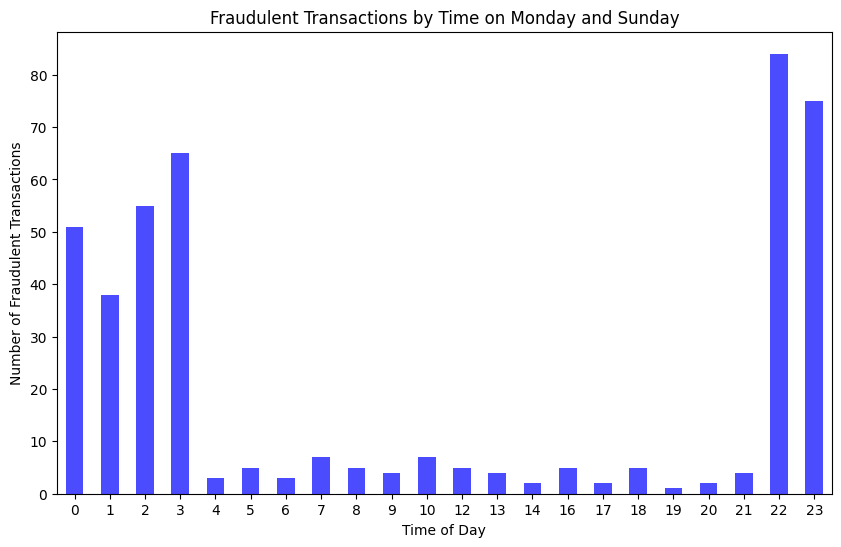

In [50]:
fraud_on_monday_sunday=fraud_trans[fraud_trans['day_of_week'].isin([0,1])]
fraud_by_time_monday_sunday = fraud_on_monday_sunday.groupby(['hour_of_day'])['is_fraud'].count()

fraud_by_time_monday_sunday.plot(kind='bar', figsize=(10, 6), color=['blue'], alpha=0.7)

plt.title('Fraudulent Transactions by Time on Monday and Sunday')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=0)
plt.show()


In [ ]:
''' 위의 Number of Fraudulent Transactions 그래프와 매우 유사한 형태''''